In [ ]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [ ]:
#load and preprocessing the augmanted images
from keras.utils import to_categorical
from keras.models import Sequential
from keras.layers import Conv2D
from keras.layers import MaxPooling2D
from keras.layers import Dense
from keras.layers import Flatten
from keras.preprocessing.image import ImageDataGenerator
#from keras.preprocessing.image import image_dataset_from_directory 
import os
import zipfile
# Directory with our training pictures
train_chest = os.path.join('gdrive/My Drive/dataset/train/')


from tensorflow.keras.preprocessing.image import ImageDataGenerator

#crate the image generator to (resize, normalize, filter and augmantation) images
# All images will be rescaled by 1./255
train_datagen = ImageDataGenerator(
      rescale=1./255,
      rotation_range=40,
      width_shift_range=0.2,
      height_shift_range=0.2,
      validation_split=0.3,
      fill_mode='nearest')


# Flow training images in batches of 32 using train_datagen generator
train_generator = train_datagen.flow_from_directory(
        train_chest,  # This is the source directory for training images
        target_size=(224, 224),  # All images will be resized to 224x224
        batch_size=32,
        subset='training',
        # Since we use categorical_crossentropy loss, 
        class_mode='categorical')

# Flow validation images in batches of 64 using validation_datagen generator
validation_generator = train_datagen.flow_from_directory(
        train_chest, # This is the source directory for validation images
        target_size=(224, 224),  # All images will be resized to 224x224
        batch_size=64,
        subset='validation',
        # Since we use categorical_crossentropy loss, 
        class_mode='categorical')




Found 52622 images belonging to 4 classes.
Found 22549 images belonging to 4 classes.


Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
resnet152v2 (Functional)     (None, 7, 7, 2048)        58331648  
_________________________________________________________________
reshape_2 (Reshape)          (None, 7, 7, 2048)        0         
_________________________________________________________________
time_distributed (TimeDistri (None, 7, 14336)          0         
_________________________________________________________________
gru (GRU)                    (None, 256)               11208192  
_________________________________________________________________
dense_4 (Dense)              (None, 128)               32896     
_________________________________________________________________
dropout_3 (Dropout)          (None, 128)               0         
_________________________________________________________________
dense_5 (Dense)              (None, 4)                

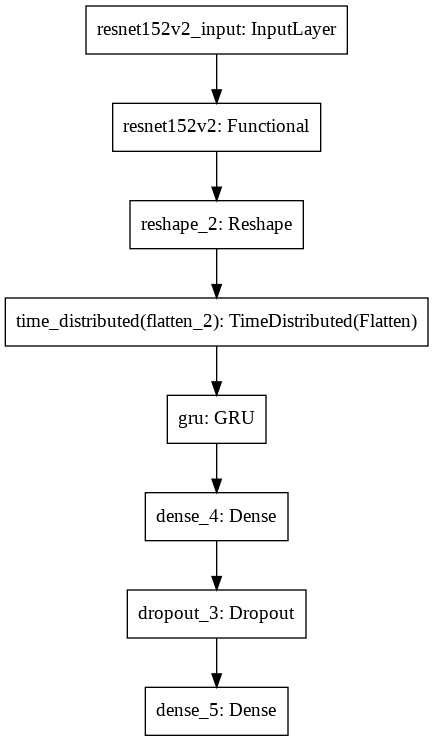

In [ ]:
#ResNet152V2 model + ResNet152V2 and GRU + ResNet152V2 and BGRU
import numpy as np
import keras
import tensorflow as tf
from tensorflow import keras
from keras import layers
from keras.layers import Dense, Conv2D, BatchNormalization, Activation
from keras.layers import AveragePooling2D, Input, Flatten
from keras.optimizers import Adam
from keras.callbacks import ModelCheckpoint, LearningRateScheduler
from keras.callbacks import ReduceLROnPlateau
from keras.preprocessing.image import ImageDataGenerator
from keras.regularizers import l2
from keras import backend as K
from keras.models import Model
import numpy as np
from keras import regularizers
from tensorflow.keras import initializers
from keras.layers.normalization import BatchNormalization
from keras.applications import ResNet152V2
import os
import tensorflow as tf
from keras.utils import to_categorical
from keras.models import Sequential
from keras.layers import Conv2D
from keras.layers import MaxPooling2D
from keras.layers import Dense
from keras.layers import Flatten
from keras.preprocessing.image import ImageDataGenerator
import os
import zipfile
import tensorflow as tf
import numpy as np
import keras
import tensorflow as tf
from tensorflow import keras
from keras import layers
from keras.layers import Dense, Conv2D, BatchNormalization, Activation
from keras.layers import AveragePooling2D, Input, Flatten
from keras.optimizers import Adam
from keras.callbacks import ModelCheckpoint, LearningRateScheduler
from keras.callbacks import ReduceLROnPlateau
from keras.preprocessing.image import ImageDataGenerator
from keras.regularizers import l2
from keras import backend as K
from keras.models import Model
import numpy as np
import os
import tensorflow as tf
from keras.optimizers import SGD, Adam
from keras.utils.np_utils import to_categorical
from keras.wrappers.scikit_learn import KerasClassifier
from keras.models import Sequential
from keras.layers import Dense
from keras.regularizers import l2
from keras.models import Sequential
from keras.layers import Conv2D, TimeDistributed,Lambda, MaxPooling2D,AveragePooling2D, GRU# convolution layers
from keras.layers import Dense, Dropout, Flatten,Activation,Reshape,Bidirectional # core layers1
from keras.layers.normalization import BatchNormalization
from keras.applications.resnet50 import ResNet50
from tensorflow.keras.preprocessing import image
from tensorflow.keras.applications.resnet50 import preprocess_input, decode_predictions
import numpy as np
def createModel():
   top_model = Sequential()
   top_model.add(ResNet152V2(include_top=False,weights="imagenet",input_shape=(224,224,3)))
   top_model.add(Reshape((7,7,2048), input_shape=(-1,7,7,2048)))
   top_model.add(TimeDistributed(Flatten()))
   #top_model.add(Flatten())
   #top_model.add(GRU(256, return_sequences=False))  
   top_model.add(Bidirectional(GRU(256, return_sequences=False)) )  
   top_model.add(Dense(128, activation='relu'))
   top_model.add(Dropout(0.5))
   top_model.add(Dense(4, activation='softmax'))
   return top_model
model = createModel()

model.summary()
#plot the model as a graph
keras.utils.plot_model(model, "my_first_model.png")

Epoch 1/300
8/8 [==============================] - 255s 32s/step - loss: 0.2123 - tp: 238.0000 - fp: 16.0000 - tn: 752.0000 - fn: 18.0000 - accuracy: 0.9375 - precision: 0.9370 - recall: 0.9297 - auc: 0.9879 - val_loss: 0.4677 - val_tp: 442.0000 - val_fp: 67.0000 - val_tn: 1469.0000 - val_fn: 70.0000 - val_accuracy: 0.8672 - val_precision: 0.8684 - val_recall: 0.8633 - val_auc: 0.9690
Epoch 2/300
8/8 [==============================] - 229s 29s/step - loss: 0.2297 - tp: 238.0000 - fp: 18.0000 - tn: 750.0000 - fn: 18.0000 - accuracy: 0.9297 - precision: 0.9297 - recall: 0.9297 - auc: 0.9891 - val_loss: 0.3913 - val_tp: 458.0000 - val_fp: 53.0000 - val_tn: 1483.0000 - val_fn: 54.0000 - val_accuracy: 0.8965 - val_precision: 0.8963 - val_recall: 0.8945 - val_auc: 0.9714
Epoch 3/300
8/8 [==============================] - 217s 27s/step - loss: 0.2668 - tp: 236.0000 - fp: 18.0000 - tn: 750.0000 - fn: 20.0000 - accuracy: 0.9219 - precision: 0.9291 - recall: 0.9219 - auc: 0.9843 - val_loss: 0.36

NameError: ignored

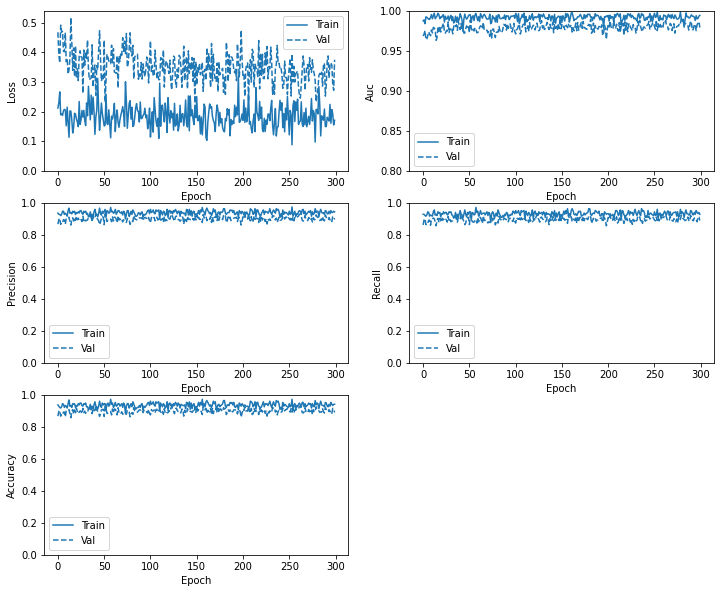

In [ ]:
# CNN Model
 
from keras.optimizers import SGD, Adam
from keras.utils.np_utils import to_categorical
from keras.wrappers.scikit_learn import KerasClassifier
from keras.models import Sequential
from keras.layers import Dense
from keras.regularizers import l2
from keras.models import Sequential
from keras.layers import Conv2D, Lambda, MaxPooling2D,AveragePooling2D# convolution layers
from keras.layers import Dense, Dropout, Flatten,Activation # core layers1
from keras.layers.normalization import BatchNormalization
from tensorflow.keras.optimizers import RMSprop, Adamax
import tensorflow as tf
from tensorflow import keras
 
import os
import tempfile
 
import matplotlib as mpl
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
from tensorflow.keras.optimizers import SGD, Adam
import sklearn
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from keras import regularizers

classes_no=8

#MobileNetV2 using trained weights model
import numpy as np
import keras
import tensorflow as tf
from tensorflow import keras
from keras import layers
from keras.layers import Dense, Conv2D, BatchNormalization, Activation
from keras.layers import AveragePooling2D, Input, Flatten
from keras.optimizers import Adam
from keras.callbacks import ModelCheckpoint, LearningRateScheduler
from keras.callbacks import ReduceLROnPlateau
from keras.preprocessing.image import ImageDataGenerator
from keras.regularizers import l2
from keras import backend as K
from keras.models import Model
import numpy as np
from keras.layers.normalization import BatchNormalization
from keras.applications import ResNet152V2,MobileNetV2
import os
import tensorflow as tf
from keras.utils import to_categorical
from keras.models import Sequential
from keras.layers import Conv2D
from keras.layers import MaxPooling2D
from keras.layers import Dense
from keras.layers import Flatten
from keras.preprocessing.image import ImageDataGenerator
import os
import zipfile
import tensorflow as tf
import numpy as np
import keras
import tensorflow as tf
from tensorflow import keras
from keras import layers
from keras.layers import Dense, Conv2D, BatchNormalization, Activation
from keras.layers import AveragePooling2D, Input, Flatten
from keras.optimizers import Adam
from keras.callbacks import ModelCheckpoint, LearningRateScheduler
from keras.callbacks import ReduceLROnPlateau
from keras.preprocessing.image import ImageDataGenerator
from keras.regularizers import l2
from keras import backend as K
from keras.models import Model
import numpy as np
import os
import tensorflow as tf
from keras.optimizers import SGD, Adam, RMSprop 
from keras.utils.np_utils import to_categorical
from keras.wrappers.scikit_learn import KerasClassifier
from keras.models import Sequential
from keras.layers import Dense
from keras.regularizers import l2
from keras.models import Sequential
from keras.layers import Conv2D, Lambda, MaxPooling2D,AveragePooling2D# convolution layers
from keras.layers import Dense, Dropout, Flatten,Activation,Reshape # core layers1
from keras.layers.normalization import BatchNormalization
from keras.applications.resnet50 import ResNet50
from tensorflow.keras.preprocessing import image
from tensorflow.keras.applications.resnet50 import preprocess_input, decode_predictions
import numpy as np

#opt = RMSprop(learning_rate=0.001) 
#opt = SGD(lr= 0.00006, momentum=0.9)    
opt = Adamax(lr= 0.000009, beta_1=0.9, beta_2=0.999, epsilon=1e-07)
    # Compile model
METRICS = [
      keras.metrics.TruePositives(name='tp'),
      keras.metrics.FalsePositives(name='fp'),
      keras.metrics.TrueNegatives(name='tn'),
      keras.metrics.FalseNegatives(name='fn'), 
      keras.metrics.CategoricalAccuracy(name='accuracy'),
      keras.metrics.Precision(name='precision'),
      keras.metrics.Recall(name='recall'),
      keras.metrics.AUC(name='auc'),
  ]
   
model.compile(loss='categorical_crossentropy', optimizer= opt ,metrics=[METRICS])
history = model.fit(
      train_generator,
      steps_per_epoch=8,
      epochs=300,
      verbose=1,
      validation_data = validation_generator,
      validation_steps=8) 
       
#Save and serialize
model.save('gdrive/My Drive/my_model_ResnetBGRUc_55.h5')
print('model saved!!!!!')


#Plot accuracy
import matplotlib as mpl
import matplotlib.pyplot as plt
def plot_metrics(history):
  metrics =  ['loss', 'auc', 'precision', 'recall', 'accuracy']
  mpl.rcParams['figure.figsize'] = (12, 10)
  colors = plt.rcParams['axes.prop_cycle'].by_key()['color']
  for n, metric in enumerate(metrics):
    name = metric.replace("_"," ").capitalize()
    plt.subplot(3,2,n+1)
    plt.plot(history.epoch,  history.history[metric], color=colors[0], label='Train')
    plt.plot(history.epoch, history.history['val_'+metric],
             color=colors[0], linestyle="--", label='Val')
    plt.xlabel('Epoch')
    plt.ylabel(name)
    if metric == 'loss':
      plt.ylim([0, plt.ylim()[1]])
    elif metric == 'auc':
      plt.ylim([0.8,1])
    elif metric == 'accuracy':
      plt.ylim([0,1])  
    else:
      plt.ylim([0,1])
 
    plt.legend()
 
plot_metrics(history)

#Confusion Matrix and Classification Report 1
from sklearn.metrics import classification_report
from sklearn.metrics import ConfusionMatrixDisplay
import matplotlib as mpl
import matplotlib.pyplot as plt
batch_size=32
Y_pred = model.predict_generator(validation_generator, 22549//  batch_size+1)
y_pred = np.argmax(Y_pred, axis=1)
print('Confusion Matrix')
print(confusion_matrix(validation_generator.classes, y_pred))
print('Classification Report')
target_names = ['Normal', 'Pneumonia', 'Corona', 'Luge Cancer ']
print(classification_report(validation_generator.classes, y_pred, target_names=target_names))

disp = ConfusionMatrixDisplay(confusion_matrix=confusion_matrix, display_labels=target_names)
print(disp)

# ConfusionMatrix2
from keras.wrappers.scikit_learn import KerasClassifier
from sklearn.model_selection import cross_val_score

from sklearn.model_selection import cross_val_predict
from sklearn.model_selection import KFold
kfold = KFold(n_splits=10, shuffle=True, random_state=42)
classiifier = KerasClassifier(build_fn = model,epochs=120,batch_size=64,verbose=2)
#The cross_val_score will return the ten accuracies of the ten test folds used in the computation
#accuracies = cross_val_score(classiifier,X11,y_pred,cv = kfold)

from sklearn.model_selection import cross_val_predict
from sklearn.metrics import confusion_matrix
#y_test_actual=np.argmax(labels, axis=1)
conf_mat = confusion_matrix(validation_generator.classes, y_pred)
print(conf_mat)



In [ ]:
from keras.models import load_model
model = keras.models.load_model('gdrive/My Drive/my_model_ResnetBGRUc_44.h5')

80142336/80134624 [==============================] - 1s 0us/step
Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
vgg19 (Functional)           (None, 7, 7, 512)         20024384  
_________________________________________________________________
reshape (Reshape)            (None, 7, 7, 512)         0         
_________________________________________________________________
conv2d (Conv2D)              (None, 7, 7, 128)         1638528   
_________________________________________________________________
activation (Activation)      (None, 7, 7, 128)         0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 7, 7, 128)         409728    
_________________________________________________________________
activation_1 (Activation)    (None, 7, 7, 128)         0         
_________________________________________________________

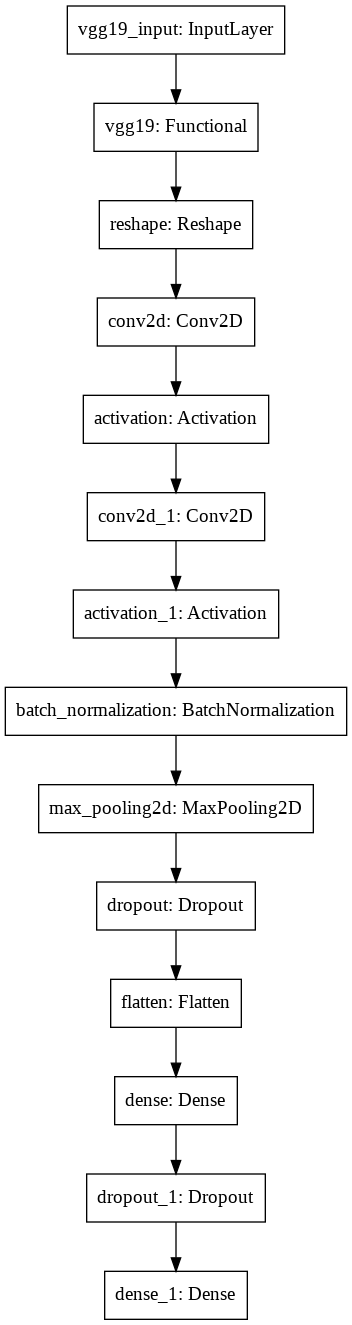

In [ ]:

#MobileNetV2 using trained weights model vgg+cnn NNNNNNNNNNNNNNNNNNN
import numpy as np
import keras
import tensorflow as tf
from tensorflow import keras
from keras import layers
from keras.layers import Dense, Conv2D, BatchNormalization, Activation
from keras.layers import AveragePooling2D, Input, Flatten
from keras.optimizers import Adam
from keras.callbacks import ModelCheckpoint, LearningRateScheduler
from keras.callbacks import ReduceLROnPlateau
from keras.preprocessing.image import ImageDataGenerator
from keras.regularizers import l2
from keras import backend as K
from keras.models import Model
import numpy as np
from keras.layers.normalization import BatchNormalization
from keras.applications import ResNet152V2,MobileNetV2
import os
import tensorflow as tf
from keras.utils import to_categorical
from keras.models import Sequential
from keras.layers import Conv2D
from keras.layers import MaxPooling2D
from keras.layers import Dense
from keras.layers import Flatten
from keras.preprocessing.image import ImageDataGenerator
import os
import zipfile
import tensorflow as tf
import numpy as np
import keras
import tensorflow as tf
from tensorflow import keras
from keras import layers
from keras.layers import Dense, Conv2D, BatchNormalization, Activation
from keras.layers import AveragePooling2D, Input, Flatten
from keras.optimizers import Adam
from keras.callbacks import ModelCheckpoint, LearningRateScheduler
from keras.callbacks import ReduceLROnPlateau
from keras.preprocessing.image import ImageDataGenerator
from keras.regularizers import l2
from keras import backend as K
from keras.models import Model
import numpy as np
import os
import tensorflow as tf
from keras.optimizers import SGD, Adam
from keras.utils.np_utils import to_categorical
from keras.wrappers.scikit_learn import KerasClassifier
from keras.models import Sequential
from keras.layers import Dense
from keras.regularizers import l2
from keras.models import Sequential
from keras.layers import Conv2D, Lambda, MaxPooling2D,AveragePooling2D# convolution layers
from keras.layers import Dense, Dropout, Flatten,Activation,Reshape # core layers1
from keras.layers.normalization import BatchNormalization
from keras.applications.resnet50 import ResNet50
from keras.applications import VGG19
from tensorflow.keras.preprocessing import image
from tensorflow.keras.applications.resnet50 import preprocess_input, decode_predictions
import numpy as np
from keras import regularizers



def createModel():
   top_model = Sequential()
   top_model.add(VGG19(include_top=False,weights="imagenet",input_shape=(224,224,3)))
   top_model.add(Reshape((7,7,512), input_shape=(-1,7,7,512)))
   top_model.add(Conv2D(128,  5, padding="same",kernel_initializer='random_normal',bias_initializer='zeros', kernel_regularizer=regularizers.l2(0.01), bias_regularizer=regularizers.l2(0.01)))
   top_model.add(Activation('relu'))
   top_model.add(Conv2D(128,  5, padding="same"))
   top_model.add(Activation('relu'))
   top_model.add(BatchNormalization())
   top_model.add(MaxPooling2D(pool_size=3 ,strides=3))
   top_model.add(Dropout(0.7))
   top_model.add(Flatten())
   top_model.add(Dense(512, activation='relu'))
   top_model.add(Dropout(0.5))
   top_model.add(Dense(4, activation='softmax'))
   
   return top_model

model=createModel()
model.summary()
keras.utils.plot_model(model, "my_first_model.png")